In [1]:
import numpy as np
import stars
import stars.glasso
import matplotlib.pyplot as plt

**Global parameters**

In [2]:
p = 100 # Number of variables
n = 400 # Number of samples

# Fix random seed
np.random.seed(42)

### Test using an Erdos-Renyi graph with average degree 2

In [3]:
import sempler

W = sempler.dag_avg_deg(p, 2, 0.1, 0.2)
sem = sempler.LGANM(W, (1,2))
true_cov = sem.sample(population=True).covariance
true_precision = np.linalg.inv(true_cov)
true_precision -= np.diag(np.diag(true_precision))
X = sem.sample(n)

In [4]:
# Fit the Graphical Lasso using the lambda selected by StARS

estimate = stars.glasso.fit(X, debug=True)

JUMP  0 : f( 2 )= 0.0  - delta:  0.05
JUMP  1 : f( 3 )= 0.0  - delta:  0.05
JUMP  2 : f( 4 )= 0.00030303030303030303  - delta:  0.0496969696969697
JUMP  3 : f( 5 )= 0.0016161616161616162  - delta:  0.04838383838383839
JUMP  4 : f( 6 )= 0.00808080808080808  - delta:  0.041919191919191925
   5 : f( 7 )= 0.023535353535353534 > 0.05
JUMP  6 : f( 6.5 )= 0.023535353535353534  - delta:  0.02646464646464647
   7 : f( 7.0 )= 0.03464646464646465 > 0.05
JUMP  8 : f( 6.75 )= 0.03464646464646465  - delta:  0.015353535353535355
   9 : f( 7.0 )= 0.04252525252525253 > 0.05
JUMP  10 : f( 6.875 )= 0.04252525252525253  - delta:  0.007474747474747474
   11 : f( 7.0 )= 0.04717171717171717 > 0.05
JUMP  12 : f( 6.9375 )= 0.04717171717171717  - delta:  0.0028282828282828326
   13 : f( 7.0 )= 0.048484848484848485 > 0.05
JUMP  14 : f( 6.96875 )= 0.048484848484848485  - delta:  0.001515151515151518
   15 : f( 7.0 )= 0.0497979797979798 > 0.05
JUMP  16 : f( 6.984375 )= 0.0497979797979798  - delta:  0.0002020202020


Precision 0.6666666666666666 Recall 0.2876712328767123


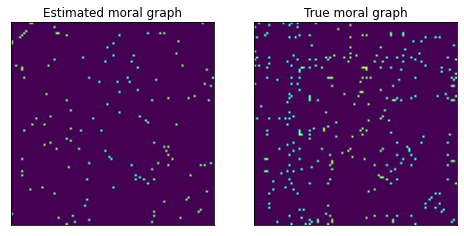

In [5]:
# Analyisis: Precision / recall
moral = estimate
true_moral = (abs(true_precision) > 1e-4).astype(int)


plt.figure(figsize=(8,8))
plt.subplot(121)
plt.title("Estimated moral graph")
plt.imshow(moral)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.subplot(122)
plt.title("True moral graph")
plt.imshow(true_moral)
plt.gca().set_xticks([])
plt.gca().set_yticks([])

true_positives = np.logical_and(moral, true_moral).sum()
precision = true_positives / moral.sum()
recall = true_positives / true_moral.sum()

print("\nPrecision", precision, "Recall", recall)

### Test on a "neighbourhood graph"

**As described in the StARS paper (https://arxiv.org/pdf/1006.3316.pdf, page 10)**

In [6]:
true_precision = stars.neighbourhood_graph(p)
true_covariance = np.linalg.inv(true_precision)
true_precision -= np.diag(np.diag(true_precision))
X = np.random.multivariate_normal(np.zeros(p), true_covariance, size=n)

In [7]:
# Fit the Graphical Lasso using the lambda selected by StARS

estimate = stars.glasso.fit(X, debug=True)

JUMP  0 : f( 2 )= 0.0  - delta:  0.05
JUMP  1 : f( 3 )= 0.0  - delta:  0.05
JUMP  2 : f( 4 )= 0.0026262626262626263  - delta:  0.047373737373737373
JUMP  3 : f( 5 )= 0.005757575757575757  - delta:  0.04424242424242424
JUMP  4 : f( 6 )= 0.010404040404040403  - delta:  0.0395959595959596
JUMP  5 : f( 7 )= 0.022525252525252525  - delta:  0.027474747474747478
   6 : f( 8 )= 0.04242424242424243 > 0.05
   7 : f( 7.5 )= 0.04242424242424243 > 0.05
JUMP  8 : f( 7.25 )= 0.04242424242424243  - delta:  0.007575757575757576
   9 : f( 7.5 )= 0.04757575757575758 > 0.05
   10 : f( 7.375 )= 0.04757575757575758 > 0.05
JUMP  11 : f( 7.3125 )= 0.04757575757575758  - delta:  0.002424242424242426
   12 : f( 7.375 )= 0.04888888888888889 > 0.05
JUMP  13 : f( 7.34375 )= 0.04888888888888889  - delta:  0.0011111111111111113
   14 : f( 7.375 )= 0.049494949494949494 > 0.05
JUMP  15 : f( 7.359375 )= 0.049494949494949494  - delta:  0.0005050505050505083
   16 : f( 7.375 )= 0.0498989898989899 > 0.05
JUMP  17 : f( 7.3


Precision 0.8113207547169812 Recall 0.9416058394160584


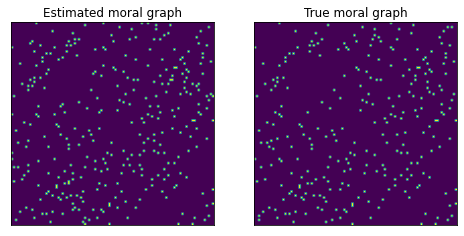

In [8]:
# Analyisis: Precision / recall
moral = estimate
true_moral = (abs(true_precision) > 1e-4).astype(int)


plt.figure(figsize=(8,8))
plt.subplot(121)
plt.title("Estimated moral graph")
plt.imshow(moral)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.subplot(122)
plt.title("True moral graph")
plt.imshow(true_moral)
plt.gca().set_xticks([])
plt.gca().set_yticks([])

true_positives = np.logical_and(moral, true_moral).sum()
precision = true_positives / moral.sum()
recall = true_positives / true_moral.sum()

print("\nPrecision", precision, "Recall", recall)